Convolutional Dictionary Learning
=================================

This example demonstrates the use of [dictlrn.cbpdndl.ConvBPDNDictLearn](http://sporco.rtfd.org/en/latest/modules/sporco.dictlrn.cbpdndl.html#sporco.dictlrn.cbpdndl.ConvBPDNDictLearn) for learning a convolutional dictionary from a set of training images. The dictionary learning algorithm is based on the ADMM consensus dictionary update [[1]](http://sporco.rtfd.org/en/latest/zreferences.html#sorel-2016-fast) [[20]](http://sporco.rtfd.org/en/latest/zreferences.html#garcia-2018-convolutional1).

In [1]:
from __future__ import print_function
from builtins import input
from builtins import range

import pyfftw   # See https://github.com/pyFFTW/pyFFTW/issues/40
import numpy as np

from sporco.dictlrn import cbpdndl
from sporco import util
from sporco import plot
plot.config_notebook_plotting()

Load training images.

In [2]:
exim = util.ExampleImages(scaled=True, zoom=0.25, gray=True)
S1 = exim.image('barbara.png', idxexp=np.s_[10:522, 100:612])
S2 = exim.image('kodim23.png', idxexp=np.s_[:, 60:572])
S3 = exim.image('monarch.png', idxexp=np.s_[:, 160:672])
S4 = exim.image('sail.png', idxexp=np.s_[:, 210:722])
S5 = exim.image('tulips.png', idxexp=np.s_[:, 30:542])
S = np.dstack((S1, S2, S3, S4, S5))

Highpass filter training images.

In [3]:
npd = 16
fltlmbd = 5
sl, sh = util.tikhonov_filter(S, fltlmbd, npd)

Construct initial dictionary.

In [4]:
np.random.seed(12345)
D0 = np.random.randn(8, 8, 64)

Set regularization parameter and options for dictionary learning solver.

In [5]:
lmbda = 0.2
opt = cbpdndl.ConvBPDNDictLearn.Options({'Verbose': True, 'MaxMainIter': 200,
                            'CBPDN': {'rho': 50.0*lmbda + 0.5},
                            'CCMOD': {'rho': 10.0, 'ZeroMean': True}},
                            dmethod='cns')

Create solver object and solve.

In [6]:
d = cbpdndl.ConvBPDNDictLearn(D0, sh, lmbda, opt, dmethod='cns')
D1 = d.solve()
print("ConvBPDNDictLearn solve time: %.2fs" % d.timer.elapsed('solve'))

Itn   Fnc       DFid      ℓ1        Cnstr     r_X       s_X       ρ_X       r_D       s_D       ρ_D     
--------------------------------------------------------------------------------------------------------


   0  1.03e+03  1.21e+01  5.10e+03  6.31e-07  1.00e+00  4.75e-03  1.05e+01  9.99e-02  3.68e-03  1.00e+01


   1  7.94e+02  7.05e+01  3.62e+03  8.32e-07  9.73e-01  5.86e-02  1.05e+01  9.44e-02  1.03e-01  1.00e+01


   2  6.39e+02  1.31e+02  2.54e+03  6.04e-07  7.70e-01  1.23e-01  1.05e+01  8.61e-02  2.29e-01  1.00e+01


   3  5.73e+02  1.60e+02  2.07e+03  6.68e-07  3.50e-01  1.41e-01  1.05e+01  8.28e-02  2.04e-01  1.00e+01


   4  5.65e+02  1.61e+02  2.02e+03  6.85e-07  2.36e-01  1.33e-01  1.05e+01  6.51e-02  1.76e-01  1.00e+01


   5  5.86e+02  1.49e+02  2.18e+03  7.27e-07  1.90e-01  1.19e-01  1.05e+01  5.67e-02  1.18e-01  1.00e+01


   6  5.53e+02  1.37e+02  2.08e+03  7.60e-07  1.51e-01  9.54e-02  1.05e+01  4.89e-02  9.83e-02  1.00e+01


   7  5.06e+02  1.28e+02  1.89e+03  7.56e-07  1.26e-01  8.22e-02  1.05e+01  4.23e-02  8.55e-02  1.00e+01


   8  4.41e+02  1.24e+02  1.59e+03  7.13e-07  1.03e-01  7.37e-02  1.05e+01  3.78e-02  8.54e-02  1.00e+01


   9  4.15e+02  1.22e+02  1.46e+03  6.36e-07  9.00e-02  6.33e-02  1.05e+01  3.22e-02  8.39e-02  1.00e+01


  10  3.89e+02  1.22e+02  1.34e+03  7.21e-07  7.58e-02  5.33e-02  1.05e+01  2.70e-02  8.11e-02  1.00e+01


  11  3.84e+02  1.22e+02  1.31e+03  8.81e-07  6.78e-02  4.62e-02  1.05e+01  2.28e-02  7.33e-02  1.00e+01


  12  3.68e+02  1.22e+02  1.23e+03  6.77e-07  5.75e-02  4.23e-02  1.05e+01  1.98e-02  6.74e-02  1.00e+01


  13  3.65e+02  1.22e+02  1.22e+03  7.52e-07  5.23e-02  4.02e-02  1.05e+01  1.80e-02  6.16e-02  1.00e+01


  14  3.55e+02  1.21e+02  1.17e+03  7.00e-07  4.60e-02  3.82e-02  1.05e+01  1.63e-02  5.82e-02  1.00e+01


  15  3.53e+02  1.20e+02  1.17e+03  7.87e-07  4.30e-02  3.61e-02  1.05e+01  1.52e-02  5.50e-02  1.00e+01


  16  3.46e+02  1.19e+02  1.13e+03  7.21e-07  3.87e-02  3.45e-02  1.05e+01  1.40e-02  5.31e-02  1.00e+01


  17  3.43e+02  1.18e+02  1.13e+03  7.06e-07  3.66e-02  3.29e-02  1.05e+01  1.33e-02  5.11e-02  1.00e+01


  18  3.36e+02  1.17e+02  1.10e+03  7.43e-07  3.34e-02  3.14e-02  1.05e+01  1.24e-02  4.95e-02  1.00e+01


  19  3.34e+02  1.16e+02  1.09e+03  8.01e-07  3.17e-02  2.99e-02  1.05e+01  1.18e-02  4.77e-02  1.00e+01


  20  3.28e+02  1.15e+02  1.06e+03  7.56e-07  2.94e-02  2.87e-02  1.05e+01  1.12e-02  4.60e-02  1.00e+01


  21  3.26e+02  1.15e+02  1.05e+03  7.89e-07  2.81e-02  2.76e-02  1.05e+01  1.08e-02  4.43e-02  1.00e+01


  22  3.21e+02  1.14e+02  1.03e+03  6.73e-07  2.64e-02  2.67e-02  1.05e+01  1.03e-02  4.29e-02  1.00e+01


  23  3.19e+02  1.13e+02  1.03e+03  7.77e-07  2.53e-02  2.58e-02  1.05e+01  9.90e-03  4.15e-02  1.00e+01


  24  3.15e+02  1.13e+02  1.01e+03  7.63e-07  2.39e-02  2.49e-02  1.05e+01  9.51e-03  4.02e-02  1.00e+01


  25  3.14e+02  1.13e+02  1.00e+03  8.10e-07  2.30e-02  2.42e-02  1.05e+01  9.20e-03  3.90e-02  1.00e+01


  26  3.11e+02  1.12e+02  9.93e+02  6.75e-07  2.20e-02  2.36e-02  1.05e+01  8.90e-03  3.80e-02  1.00e+01


  27  3.10e+02  1.12e+02  9.88e+02  7.73e-07  2.13e-02  2.30e-02  1.05e+01  8.65e-03  3.70e-02  1.00e+01


  28  3.07e+02  1.12e+02  9.79e+02  7.28e-07  2.04e-02  2.24e-02  1.05e+01  8.40e-03  3.61e-02  1.00e+01


  29  3.06e+02  1.11e+02  9.75e+02  8.17e-07  1.97e-02  2.19e-02  1.05e+01  8.18e-03  3.52e-02  1.00e+01


  30  3.04e+02  1.11e+02  9.67e+02  8.38e-07  1.90e-02  2.14e-02  1.05e+01  7.97e-03  3.43e-02  1.00e+01


  31  3.03e+02  1.10e+02  9.62e+02  6.84e-07  1.85e-02  2.09e-02  1.05e+01  7.77e-03  3.35e-02  1.00e+01


  32  3.01e+02  1.10e+02  9.56e+02  7.51e-07  1.78e-02  2.04e-02  1.05e+01  7.58e-03  3.27e-02  1.00e+01


  33  3.00e+02  1.10e+02  9.51e+02  7.29e-07  1.73e-02  2.00e-02  1.05e+01  7.40e-03  3.19e-02  1.00e+01


  34  2.98e+02  1.09e+02  9.45e+02  7.92e-07  1.67e-02  1.95e-02  1.05e+01  7.22e-03  3.12e-02  1.00e+01


  35  2.97e+02  1.09e+02  9.40e+02  7.51e-07  1.63e-02  1.91e-02  1.05e+01  7.06e-03  3.04e-02  1.00e+01


  36  2.96e+02  1.09e+02  9.35e+02  7.09e-07  1.58e-02  1.86e-02  1.05e+01  6.91e-03  2.97e-02  1.00e+01


  37  2.95e+02  1.08e+02  9.30e+02  8.47e-07  1.53e-02  1.83e-02  1.05e+01  6.75e-03  2.90e-02  1.00e+01


  38  2.93e+02  1.08e+02  9.25e+02  7.54e-07  1.49e-02  1.78e-02  1.05e+01  6.60e-03  2.84e-02  1.00e+01


  39  2.92e+02  1.08e+02  9.21e+02  8.15e-07  1.45e-02  1.74e-02  1.05e+01  6.45e-03  2.77e-02  1.00e+01


  40  2.91e+02  1.08e+02  9.17e+02  7.09e-07  1.41e-02  1.71e-02  1.05e+01  6.33e-03  2.71e-02  1.00e+01


  41  2.90e+02  1.08e+02  9.13e+02  7.05e-07  1.37e-02  1.68e-02  1.05e+01  6.20e-03  2.65e-02  1.00e+01


  42  2.89e+02  1.07e+02  9.09e+02  7.21e-07  1.34e-02  1.65e-02  1.05e+01  6.07e-03  2.60e-02  1.00e+01


  43  2.88e+02  1.07e+02  9.06e+02  8.28e-07  1.31e-02  1.62e-02  1.05e+01  5.95e-03  2.54e-02  1.00e+01


  44  2.87e+02  1.07e+02  9.02e+02  7.39e-07  1.27e-02  1.59e-02  1.05e+01  5.83e-03  2.49e-02  1.00e+01


  45  2.87e+02  1.07e+02  8.99e+02  7.69e-07  1.24e-02  1.56e-02  1.05e+01  5.72e-03  2.44e-02  1.00e+01


  46  2.86e+02  1.07e+02  8.95e+02  7.43e-07  1.22e-02  1.53e-02  1.05e+01  5.61e-03  2.39e-02  1.00e+01


  47  2.85e+02  1.06e+02  8.92e+02  6.99e-07  1.19e-02  1.50e-02  1.05e+01  5.51e-03  2.34e-02  1.00e+01


  48  2.84e+02  1.06e+02  8.89e+02  7.61e-07  1.16e-02  1.48e-02  1.05e+01  5.41e-03  2.30e-02  1.00e+01


  49  2.83e+02  1.06e+02  8.86e+02  8.83e-07  1.14e-02  1.46e-02  1.05e+01  5.32e-03  2.25e-02  1.00e+01


  50  2.83e+02  1.06e+02  8.83e+02  8.32e-07  1.11e-02  1.43e-02  1.05e+01  5.23e-03  2.21e-02  1.00e+01


  51  2.82e+02  1.06e+02  8.81e+02  9.10e-07  1.09e-02  1.41e-02  1.05e+01  5.13e-03  2.17e-02  1.00e+01


  52  2.81e+02  1.06e+02  8.78e+02  7.13e-07  1.07e-02  1.39e-02  1.05e+01  5.05e-03  2.13e-02  1.00e+01


  53  2.81e+02  1.06e+02  8.76e+02  6.60e-07  1.05e-02  1.37e-02  1.05e+01  4.97e-03  2.10e-02  1.00e+01


  54  2.80e+02  1.05e+02  8.73e+02  7.20e-07  1.03e-02  1.35e-02  1.05e+01  4.89e-03  2.06e-02  1.00e+01


  55  2.79e+02  1.05e+02  8.71e+02  7.81e-07  1.01e-02  1.33e-02  1.05e+01  4.82e-03  2.02e-02  1.00e+01


  56  2.79e+02  1.05e+02  8.69e+02  7.70e-07  9.89e-03  1.31e-02  1.05e+01  4.75e-03  1.99e-02  1.00e+01


  57  2.78e+02  1.05e+02  8.67e+02  7.72e-07  9.71e-03  1.29e-02  1.05e+01  4.68e-03  1.96e-02  1.00e+01


  58  2.78e+02  1.05e+02  8.64e+02  7.27e-07  9.53e-03  1.27e-02  1.05e+01  4.61e-03  1.92e-02  1.00e+01


  59  2.77e+02  1.05e+02  8.62e+02  8.19e-07  9.35e-03  1.25e-02  1.05e+01  4.54e-03  1.89e-02  1.00e+01


  60  2.77e+02  1.05e+02  8.60e+02  7.80e-07  9.20e-03  1.23e-02  1.05e+01  4.48e-03  1.86e-02  1.00e+01


  61  2.76e+02  1.05e+02  8.58e+02  8.72e-07  9.05e-03  1.22e-02  1.05e+01  4.42e-03  1.83e-02  1.00e+01


  62  2.76e+02  1.04e+02  8.56e+02  8.90e-07  8.89e-03  1.21e-02  1.05e+01  4.35e-03  1.80e-02  1.00e+01


  63  2.75e+02  1.04e+02  8.55e+02  7.28e-07  8.75e-03  1.19e-02  1.05e+01  4.30e-03  1.78e-02  1.00e+01


  64  2.75e+02  1.04e+02  8.53e+02  7.89e-07  8.62e-03  1.18e-02  1.05e+01  4.25e-03  1.75e-02  1.00e+01


  65  2.74e+02  1.04e+02  8.51e+02  7.35e-07  8.48e-03  1.17e-02  1.05e+01  4.19e-03  1.73e-02  1.00e+01


  66  2.74e+02  1.04e+02  8.49e+02  7.36e-07  8.36e-03  1.15e-02  1.05e+01  4.15e-03  1.70e-02  1.00e+01


  67  2.74e+02  1.04e+02  8.48e+02  7.92e-07  8.25e-03  1.15e-02  1.05e+01  4.10e-03  1.68e-02  1.00e+01


  68  2.73e+02  1.04e+02  8.46e+02  7.44e-07  8.15e-03  1.14e-02  1.05e+01  4.06e-03  1.66e-02  1.00e+01


  69  2.73e+02  1.04e+02  8.45e+02  7.09e-07  8.04e-03  1.12e-02  1.05e+01  4.02e-03  1.64e-02  1.00e+01


  70  2.72e+02  1.04e+02  8.43e+02  7.45e-07  7.94e-03  1.11e-02  1.05e+01  3.98e-03  1.62e-02  1.00e+01


  71  2.72e+02  1.04e+02  8.42e+02  8.55e-07  7.85e-03  1.11e-02  1.05e+01  3.94e-03  1.60e-02  1.00e+01


  72  2.72e+02  1.04e+02  8.41e+02  8.19e-07  7.76e-03  1.10e-02  1.05e+01  3.90e-03  1.58e-02  1.00e+01


  73  2.71e+02  1.04e+02  8.39e+02  7.55e-07  7.67e-03  1.08e-02  1.05e+01  3.86e-03  1.56e-02  1.00e+01


  74  2.71e+02  1.03e+02  8.38e+02  6.64e-07  7.57e-03  1.07e-02  1.05e+01  3.82e-03  1.55e-02  1.00e+01


  75  2.71e+02  1.03e+02  8.37e+02  8.71e-07  7.47e-03  1.06e-02  1.05e+01  3.78e-03  1.53e-02  1.00e+01


  76  2.70e+02  1.03e+02  8.36e+02  6.73e-07  7.38e-03  1.05e-02  1.05e+01  3.74e-03  1.51e-02  1.00e+01


  77  2.70e+02  1.03e+02  8.35e+02  9.10e-07  7.28e-03  1.04e-02  1.05e+01  3.70e-03  1.49e-02  1.00e+01


  78  2.70e+02  1.03e+02  8.34e+02  7.39e-07  7.20e-03  1.03e-02  1.05e+01  3.67e-03  1.48e-02  1.00e+01


  79  2.70e+02  1.03e+02  8.32e+02  6.84e-07  7.12e-03  1.02e-02  1.05e+01  3.64e-03  1.46e-02  1.00e+01


  80  2.69e+02  1.03e+02  8.31e+02  7.83e-07  7.05e-03  1.02e-02  1.05e+01  3.60e-03  1.45e-02  1.00e+01


  81  2.69e+02  1.03e+02  8.30e+02  8.56e-07  6.95e-03  1.01e-02  1.05e+01  3.57e-03  1.43e-02  1.00e+01


  82  2.69e+02  1.03e+02  8.29e+02  7.67e-07  6.89e-03  9.97e-03  1.05e+01  3.53e-03  1.42e-02  1.00e+01


  83  2.68e+02  1.03e+02  8.28e+02  8.08e-07  6.82e-03  9.89e-03  1.05e+01  3.50e-03  1.40e-02  1.00e+01


  84  2.68e+02  1.03e+02  8.27e+02  6.43e-07  6.75e-03  9.82e-03  1.05e+01  3.47e-03  1.39e-02  1.00e+01


  85  2.68e+02  1.03e+02  8.26e+02  7.34e-07  6.67e-03  9.74e-03  1.05e+01  3.44e-03  1.37e-02  1.00e+01


  86  2.68e+02  1.03e+02  8.25e+02  8.01e-07  6.60e-03  9.68e-03  1.05e+01  3.41e-03  1.36e-02  1.00e+01


  87  2.67e+02  1.03e+02  8.24e+02  8.68e-07  6.54e-03  9.60e-03  1.05e+01  3.38e-03  1.34e-02  1.00e+01


  88  2.67e+02  1.02e+02  8.23e+02  7.10e-07  6.47e-03  9.53e-03  1.05e+01  3.35e-03  1.33e-02  1.00e+01


  89  2.67e+02  1.02e+02  8.22e+02  7.73e-07  6.41e-03  9.49e-03  1.05e+01  3.33e-03  1.32e-02  1.00e+01


  90  2.67e+02  1.02e+02  8.22e+02  7.85e-07  6.36e-03  9.44e-03  1.05e+01  3.31e-03  1.31e-02  1.00e+01


  91  2.66e+02  1.02e+02  8.21e+02  8.17e-07  6.31e-03  9.36e-03  1.05e+01  3.28e-03  1.29e-02  1.00e+01


  92  2.66e+02  1.02e+02  8.20e+02  7.75e-07  6.24e-03  9.30e-03  1.05e+01  3.26e-03  1.28e-02  1.00e+01


  93  2.66e+02  1.02e+02  8.19e+02  7.99e-07  6.19e-03  9.23e-03  1.05e+01  3.23e-03  1.27e-02  1.00e+01


  94  2.66e+02  1.02e+02  8.18e+02  6.71e-07  6.13e-03  9.16e-03  1.05e+01  3.21e-03  1.26e-02  1.00e+01


  95  2.66e+02  1.02e+02  8.18e+02  6.70e-07  6.08e-03  9.11e-03  1.05e+01  3.19e-03  1.25e-02  1.00e+01


  96  2.65e+02  1.02e+02  8.17e+02  6.84e-07  6.02e-03  9.07e-03  1.05e+01  3.16e-03  1.24e-02  1.00e+01


  97  2.65e+02  1.02e+02  8.16e+02  7.88e-07  5.97e-03  9.00e-03  1.05e+01  3.14e-03  1.23e-02  1.00e+01


  98  2.65e+02  1.02e+02  8.15e+02  8.10e-07  5.92e-03  8.93e-03  1.05e+01  3.12e-03  1.22e-02  1.00e+01


  99  2.65e+02  1.02e+02  8.15e+02  7.58e-07  5.87e-03  8.86e-03  1.05e+01  3.10e-03  1.21e-02  1.00e+01


 100  2.65e+02  1.02e+02  8.14e+02  8.16e-07  5.81e-03  8.81e-03  1.05e+01  3.07e-03  1.19e-02  1.00e+01


 101  2.64e+02  1.02e+02  8.13e+02  7.68e-07  5.77e-03  8.73e-03  1.05e+01  3.05e-03  1.18e-02  1.00e+01


 102  2.64e+02  1.02e+02  8.12e+02  8.00e-07  5.71e-03  8.66e-03  1.05e+01  3.03e-03  1.17e-02  1.00e+01


 103  2.64e+02  1.02e+02  8.12e+02  7.64e-07  5.66e-03  8.59e-03  1.05e+01  3.01e-03  1.16e-02  1.00e+01


 104  2.64e+02  1.02e+02  8.11e+02  7.93e-07  5.61e-03  8.53e-03  1.05e+01  2.99e-03  1.15e-02  1.00e+01


 105  2.64e+02  1.02e+02  8.10e+02  7.95e-07  5.56e-03  8.44e-03  1.05e+01  2.96e-03  1.14e-02  1.00e+01


 106  2.63e+02  1.02e+02  8.10e+02  7.84e-07  5.51e-03  8.39e-03  1.05e+01  2.94e-03  1.13e-02  1.00e+01


 107  2.63e+02  1.02e+02  8.09e+02  8.23e-07  5.46e-03  8.33e-03  1.05e+01  2.92e-03  1.12e-02  1.00e+01


 108  2.63e+02  1.01e+02  8.08e+02  7.58e-07  5.41e-03  8.28e-03  1.05e+01  2.89e-03  1.11e-02  1.00e+01


 109  2.63e+02  1.01e+02  8.07e+02  8.45e-07  5.36e-03  8.23e-03  1.05e+01  2.87e-03  1.10e-02  1.00e+01


 110  2.63e+02  1.01e+02  8.07e+02  8.57e-07  5.31e-03  8.19e-03  1.05e+01  2.85e-03  1.09e-02  1.00e+01


 111  2.63e+02  1.01e+02  8.06e+02  6.93e-07  5.26e-03  8.14e-03  1.05e+01  2.83e-03  1.08e-02  1.00e+01


 112  2.62e+02  1.01e+02  8.05e+02  8.20e-07  5.22e-03  8.07e-03  1.05e+01  2.81e-03  1.07e-02  1.00e+01


 113  2.62e+02  1.01e+02  8.05e+02  7.47e-07  5.18e-03  8.01e-03  1.05e+01  2.79e-03  1.06e-02  1.00e+01


 114  2.62e+02  1.01e+02  8.04e+02  7.72e-07  5.13e-03  7.93e-03  1.05e+01  2.76e-03  1.05e-02  1.00e+01


 115  2.62e+02  1.01e+02  8.04e+02  7.07e-07  5.08e-03  7.89e-03  1.05e+01  2.74e-03  1.04e-02  1.00e+01


 116  2.62e+02  1.01e+02  8.03e+02  7.90e-07  5.03e-03  7.82e-03  1.05e+01  2.72e-03  1.03e-02  1.00e+01


 117  2.62e+02  1.01e+02  8.02e+02  8.20e-07  4.99e-03  7.76e-03  1.05e+01  2.70e-03  1.02e-02  1.00e+01


 118  2.61e+02  1.01e+02  8.02e+02  8.74e-07  4.95e-03  7.71e-03  1.05e+01  2.68e-03  1.02e-02  1.00e+01


 119  2.61e+02  1.01e+02  8.01e+02  8.27e-07  4.91e-03  7.68e-03  1.05e+01  2.66e-03  1.01e-02  1.00e+01


 120  2.61e+02  1.01e+02  8.01e+02  7.08e-07  4.88e-03  7.64e-03  1.05e+01  2.65e-03  9.99e-03  1.00e+01


 121  2.61e+02  1.01e+02  8.00e+02  6.79e-07  4.84e-03  7.58e-03  1.05e+01  2.63e-03  9.91e-03  1.00e+01


 122  2.61e+02  1.01e+02  7.99e+02  7.54e-07  4.81e-03  7.54e-03  1.05e+01  2.61e-03  9.84e-03  1.00e+01


 123  2.61e+02  1.01e+02  7.99e+02  7.56e-07  4.77e-03  7.51e-03  1.05e+01  2.59e-03  9.76e-03  1.00e+01


 124  2.61e+02  1.01e+02  7.98e+02  6.77e-07  4.74e-03  7.47e-03  1.05e+01  2.58e-03  9.69e-03  1.00e+01


 125  2.60e+02  1.01e+02  7.98e+02  7.94e-07  4.70e-03  7.44e-03  1.05e+01  2.56e-03  9.62e-03  1.00e+01


 126  2.60e+02  1.01e+02  7.97e+02  8.16e-07  4.67e-03  7.40e-03  1.05e+01  2.55e-03  9.56e-03  1.00e+01


 127  2.60e+02  1.01e+02  7.97e+02  8.47e-07  4.64e-03  7.36e-03  1.05e+01  2.53e-03  9.49e-03  1.00e+01


 128  2.60e+02  1.01e+02  7.96e+02  7.37e-07  4.61e-03  7.31e-03  1.05e+01  2.52e-03  9.43e-03  1.00e+01


 129  2.60e+02  1.01e+02  7.96e+02  6.57e-07  4.58e-03  7.26e-03  1.05e+01  2.50e-03  9.36e-03  1.00e+01


 130  2.60e+02  1.01e+02  7.95e+02  8.13e-07  4.55e-03  7.24e-03  1.05e+01  2.49e-03  9.30e-03  1.00e+01


 131  2.60e+02  1.01e+02  7.95e+02  8.20e-07  4.52e-03  7.21e-03  1.05e+01  2.48e-03  9.24e-03  1.00e+01


 132  2.60e+02  1.01e+02  7.94e+02  8.48e-07  4.49e-03  7.18e-03  1.05e+01  2.46e-03  9.18e-03  1.00e+01


 133  2.59e+02  1.01e+02  7.94e+02  8.70e-07  4.46e-03  7.13e-03  1.05e+01  2.45e-03  9.13e-03  1.00e+01


 134  2.59e+02  1.01e+02  7.93e+02  7.74e-07  4.43e-03  7.08e-03  1.05e+01  2.43e-03  9.06e-03  1.00e+01


 135  2.59e+02  1.01e+02  7.93e+02  7.06e-07  4.40e-03  7.05e-03  1.05e+01  2.42e-03  9.00e-03  1.00e+01


 136  2.59e+02  1.01e+02  7.92e+02  7.39e-07  4.37e-03  7.01e-03  1.05e+01  2.40e-03  8.94e-03  1.00e+01


 137  2.59e+02  1.01e+02  7.92e+02  8.47e-07  4.35e-03  6.97e-03  1.05e+01  2.39e-03  8.87e-03  1.00e+01


 138  2.59e+02  1.01e+02  7.92e+02  6.69e-07  4.32e-03  6.95e-03  1.05e+01  2.38e-03  8.82e-03  1.00e+01


 139  2.59e+02  1.00e+02  7.91e+02  8.00e-07  4.29e-03  6.93e-03  1.05e+01  2.37e-03  8.77e-03  1.00e+01


 140  2.59e+02  1.00e+02  7.91e+02  7.28e-07  4.26e-03  6.88e-03  1.05e+01  2.35e-03  8.72e-03  1.00e+01


 141  2.58e+02  1.00e+02  7.90e+02  7.65e-07  4.23e-03  6.82e-03  1.05e+01  2.34e-03  8.66e-03  1.00e+01


 142  2.58e+02  1.00e+02  7.90e+02  7.65e-07  4.20e-03  6.79e-03  1.05e+01  2.33e-03  8.61e-03  1.00e+01


 143  2.58e+02  1.00e+02  7.89e+02  7.70e-07  4.17e-03  6.75e-03  1.05e+01  2.31e-03  8.56e-03  1.00e+01


 144  2.58e+02  1.00e+02  7.89e+02  8.16e-07  4.15e-03  6.73e-03  1.05e+01  2.30e-03  8.51e-03  1.00e+01


 145  2.58e+02  1.00e+02  7.89e+02  7.71e-07  4.12e-03  6.70e-03  1.05e+01  2.29e-03  8.47e-03  1.00e+01


 146  2.58e+02  1.00e+02  7.88e+02  7.46e-07  4.10e-03  6.63e-03  1.05e+01  2.28e-03  8.43e-03  1.00e+01


 147  2.58e+02  1.00e+02  7.88e+02  7.77e-07  4.07e-03  6.60e-03  1.05e+01  2.27e-03  8.38e-03  1.00e+01


 148  2.58e+02  1.00e+02  7.87e+02  6.36e-07  4.04e-03  6.56e-03  1.05e+01  2.26e-03  8.33e-03  1.00e+01


 149  2.58e+02  1.00e+02  7.87e+02  8.12e-07  4.02e-03  6.51e-03  1.05e+01  2.24e-03  8.28e-03  1.00e+01


 150  2.58e+02  1.00e+02  7.87e+02  8.62e-07  3.99e-03  6.48e-03  1.05e+01  2.23e-03  8.23e-03  1.00e+01


 151  2.57e+02  1.00e+02  7.86e+02  7.52e-07  3.97e-03  6.46e-03  1.05e+01  2.22e-03  8.18e-03  1.00e+01


 152  2.57e+02  1.00e+02  7.86e+02  8.25e-07  3.94e-03  6.44e-03  1.05e+01  2.21e-03  8.14e-03  1.00e+01


 153  2.57e+02  1.00e+02  7.85e+02  7.81e-07  3.92e-03  6.42e-03  1.05e+01  2.20e-03  8.10e-03  1.00e+01


 154  2.57e+02  1.00e+02  7.85e+02  8.42e-07  3.90e-03  6.40e-03  1.05e+01  2.19e-03  8.06e-03  1.00e+01


 155  2.57e+02  1.00e+02  7.85e+02  7.25e-07  3.87e-03  6.36e-03  1.05e+01  2.18e-03  8.02e-03  1.00e+01


 156  2.57e+02  1.00e+02  7.84e+02  7.88e-07  3.85e-03  6.31e-03  1.05e+01  2.17e-03  7.98e-03  1.00e+01


 157  2.57e+02  1.00e+02  7.84e+02  8.47e-07  3.83e-03  6.27e-03  1.05e+01  2.16e-03  7.93e-03  1.00e+01


 158  2.57e+02  1.00e+02  7.84e+02  8.17e-07  3.81e-03  6.23e-03  1.05e+01  2.15e-03  7.88e-03  1.00e+01


 159  2.57e+02  1.00e+02  7.83e+02  7.94e-07  3.78e-03  6.20e-03  1.05e+01  2.13e-03  7.84e-03  1.00e+01


 160  2.57e+02  1.00e+02  7.83e+02  8.40e-07  3.76e-03  6.17e-03  1.05e+01  2.12e-03  7.79e-03  1.00e+01


 161  2.56e+02  9.99e+01  7.83e+02  6.90e-07  3.73e-03  6.13e-03  1.05e+01  2.11e-03  7.74e-03  1.00e+01


 162  2.56e+02  9.99e+01  7.82e+02  8.89e-07  3.71e-03  6.09e-03  1.05e+01  2.10e-03  7.69e-03  1.00e+01


 163  2.56e+02  9.99e+01  7.82e+02  8.44e-07  3.69e-03  6.05e-03  1.05e+01  2.09e-03  7.64e-03  1.00e+01


 164  2.56e+02  9.99e+01  7.81e+02  7.85e-07  3.66e-03  6.03e-03  1.05e+01  2.08e-03  7.60e-03  1.00e+01


 165  2.56e+02  9.99e+01  7.81e+02  7.79e-07  3.64e-03  6.00e-03  1.05e+01  2.07e-03  7.56e-03  1.00e+01


 166  2.56e+02  9.98e+01  7.81e+02  6.47e-07  3.62e-03  5.98e-03  1.05e+01  2.06e-03  7.52e-03  1.00e+01


 167  2.56e+02  9.98e+01  7.80e+02  7.35e-07  3.60e-03  5.97e-03  1.05e+01  2.05e-03  7.49e-03  1.00e+01


 168  2.56e+02  9.98e+01  7.80e+02  7.38e-07  3.58e-03  5.94e-03  1.05e+01  2.04e-03  7.45e-03  1.00e+01


 169  2.56e+02  9.98e+01  7.80e+02  7.13e-07  3.55e-03  5.88e-03  1.05e+01  2.03e-03  7.42e-03  1.00e+01


 170  2.56e+02  9.98e+01  7.79e+02  6.37e-07  3.53e-03  5.84e-03  1.05e+01  2.02e-03  7.37e-03  1.00e+01


 171  2.56e+02  9.97e+01  7.79e+02  8.87e-07  3.51e-03  5.83e-03  1.05e+01  2.01e-03  7.33e-03  1.00e+01


 172  2.55e+02  9.97e+01  7.79e+02  8.17e-07  3.49e-03  5.80e-03  1.05e+01  2.00e-03  7.29e-03  1.00e+01


 173  2.55e+02  9.97e+01  7.79e+02  7.78e-07  3.47e-03  5.75e-03  1.05e+01  1.99e-03  7.25e-03  1.00e+01


 174  2.55e+02  9.97e+01  7.78e+02  7.38e-07  3.45e-03  5.72e-03  1.05e+01  1.98e-03  7.20e-03  1.00e+01


 175  2.55e+02  9.97e+01  7.78e+02  8.44e-07  3.43e-03  5.70e-03  1.05e+01  1.97e-03  7.16e-03  1.00e+01


 176  2.55e+02  9.96e+01  7.78e+02  7.18e-07  3.40e-03  5.65e-03  1.05e+01  1.96e-03  7.12e-03  1.00e+01


 177  2.55e+02  9.96e+01  7.77e+02  7.47e-07  3.39e-03  5.62e-03  1.05e+01  1.95e-03  7.08e-03  1.00e+01


 178  2.55e+02  9.96e+01  7.77e+02  7.29e-07  3.37e-03  5.60e-03  1.05e+01  1.94e-03  7.04e-03  1.00e+01


 179  2.55e+02  9.96e+01  7.77e+02  7.13e-07  3.35e-03  5.58e-03  1.05e+01  1.93e-03  7.00e-03  1.00e+01


 180  2.55e+02  9.96e+01  7.77e+02  7.32e-07  3.33e-03  5.54e-03  1.05e+01  1.92e-03  6.96e-03  1.00e+01


 181  2.55e+02  9.95e+01  7.76e+02  7.27e-07  3.31e-03  5.52e-03  1.05e+01  1.91e-03  6.93e-03  1.00e+01


 182  2.55e+02  9.95e+01  7.76e+02  7.22e-07  3.29e-03  5.50e-03  1.05e+01  1.90e-03  6.90e-03  1.00e+01


 183  2.55e+02  9.95e+01  7.76e+02  7.53e-07  3.28e-03  5.47e-03  1.05e+01  1.89e-03  6.86e-03  1.00e+01


 184  2.55e+02  9.95e+01  7.76e+02  7.54e-07  3.26e-03  5.45e-03  1.05e+01  1.89e-03  6.83e-03  1.00e+01


 185  2.55e+02  9.95e+01  7.75e+02  7.31e-07  3.25e-03  5.44e-03  1.05e+01  1.88e-03  6.80e-03  1.00e+01


 186  2.54e+02  9.95e+01  7.75e+02  8.64e-07  3.23e-03  5.42e-03  1.05e+01  1.87e-03  6.77e-03  1.00e+01


 187  2.54e+02  9.94e+01  7.75e+02  7.11e-07  3.22e-03  5.41e-03  1.05e+01  1.87e-03  6.75e-03  1.00e+01


 188  2.54e+02  9.94e+01  7.74e+02  7.77e-07  3.20e-03  5.36e-03  1.05e+01  1.86e-03  6.72e-03  1.00e+01


 189  2.54e+02  9.94e+01  7.74e+02  8.04e-07  3.18e-03  5.32e-03  1.05e+01  1.85e-03  6.68e-03  1.00e+01


 190  2.54e+02  9.94e+01  7.74e+02  8.13e-07  3.16e-03  5.28e-03  1.05e+01  1.83e-03  6.65e-03  1.00e+01


 191  2.54e+02  9.94e+01  7.74e+02  6.74e-07  3.14e-03  5.26e-03  1.05e+01  1.83e-03  6.61e-03  1.00e+01


 192  2.54e+02  9.94e+01  7.73e+02  7.69e-07  3.13e-03  5.24e-03  1.05e+01  1.82e-03  6.57e-03  1.00e+01


 193  2.54e+02  9.93e+01  7.73e+02  6.82e-07  3.11e-03  5.23e-03  1.05e+01  1.81e-03  6.54e-03  1.00e+01


 194  2.54e+02  9.93e+01  7.73e+02  8.00e-07  3.10e-03  5.20e-03  1.05e+01  1.80e-03  6.50e-03  1.00e+01


 195  2.54e+02  9.93e+01  7.73e+02  8.39e-07  3.08e-03  5.18e-03  1.05e+01  1.79e-03  6.47e-03  1.00e+01


 196  2.54e+02  9.93e+01  7.72e+02  7.81e-07  3.07e-03  5.15e-03  1.05e+01  1.78e-03  6.43e-03  1.00e+01


 197  2.54e+02  9.93e+01  7.72e+02  8.02e-07  3.05e-03  5.14e-03  1.05e+01  1.78e-03  6.40e-03  1.00e+01


 198  2.54e+02  9.93e+01  7.72e+02  7.94e-07  3.04e-03  5.12e-03  1.05e+01  1.77e-03  6.37e-03  1.00e+01


 199  2.54e+02  9.92e+01  7.72e+02  7.63e-07  3.02e-03  5.10e-03  1.05e+01  1.76e-03  6.33e-03  1.00e+01
--------------------------------------------------------------------------------------------------------
ConvBPDNDictLearn solve time: 107.52s


Display initial and final dictionaries.

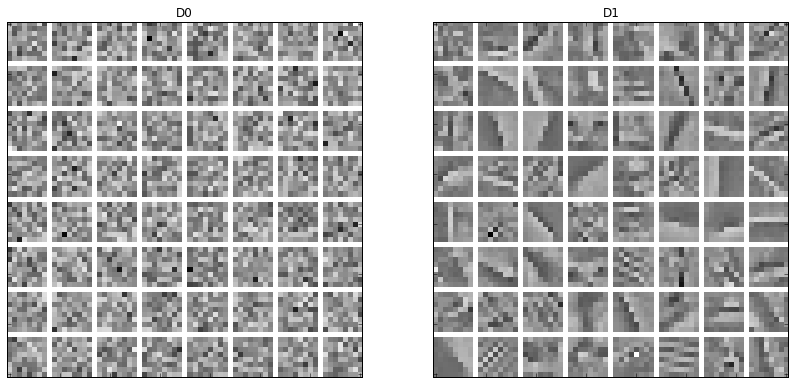

In [7]:
D1 = D1.squeeze()
fig = plot.figure(figsize=(14, 7))
plot.subplot(1, 2, 1)
plot.imview(util.tiledict(D0), title='D0', fig=fig)
plot.subplot(1, 2, 2)
plot.imview(util.tiledict(D1), title='D1', fig=fig)
fig.show()

Get iterations statistics from solver object and plot functional value, ADMM primary and dual residuals, and automatically adjusted ADMM penalty parameter against the iteration number.

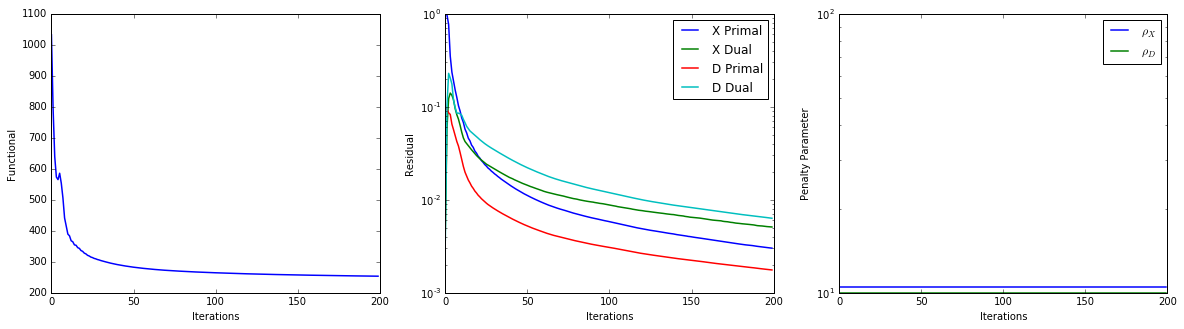

In [8]:
its = d.getitstat()
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.plot(its.ObjFun, xlbl='Iterations', ylbl='Functional', fig=fig)
plot.subplot(1, 3, 2)
plot.plot(np.vstack((its.XPrRsdl, its.XDlRsdl, its.DPrRsdl,
          its.DDlRsdl)).T, ptyp='semilogy', xlbl='Iterations',
          ylbl='Residual', lgnd=['X Primal', 'X Dual', 'D Primal', 'D Dual'],
          fig=fig)
plot.subplot(1, 3, 3)
plot.plot(np.vstack((its.XRho, its.DRho)).T, xlbl='Iterations',
          ylbl='Penalty Parameter', ptyp='semilogy',
          lgnd=['$\\rho_X$', '$\\rho_D$'], fig=fig)
fig.show()